3 To - Do - Task
Please Complete all the problem listed below.

3.1 Warming Up Exercises - Basic Inspection and Exploration:

Problem 1 - Data Read, Write and Inspect:
Complete all following Task:

• Dataset for the Task: "bank.csv"

1. Load the provided dataset and import in pandas DataFrame.

In [39]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/dataset/bank .csv')
pd.DataFrame(df)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


2. Check info of the DataFrame and identify following:

(a) columns with dtypes=object

(b) unique values of those columns.

(c) check for the total number of null values in each column.

In [24]:
df.info()
df.head()
df.columns
df.tail()

object_columns = df.select_dtypes(include = 'object').columns
print(object_columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'pou

In [10]:
unique = {}
for column in object_columns:
   unique[column] = df[column].unique()
for column, values in unique.items():
  print(f"{column}:{values}")

job:['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital:['married' 'single' 'divorced']
education:['tertiary' 'secondary' 'unknown' 'primary']
default:['no' 'yes']
housing:['yes' 'no']
loan:['no' 'yes']
contact:['unknown' 'cellular' 'telephone']
month:['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome:['unknown' 'failure' 'other' 'success']
y:['no' 'yes']


In [12]:
total_null = df.isnull().sum()
print(total_null)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”

In [16]:
drop_columns = df.select_dtypes(exclude = 'object')
drop_columns.to_csv('banknumericdata.csv' , index = False)


4. Read ”banknumericdata.csv” and Find the summary statistics.

In [23]:
read_df = pd.read_csv('/content/banknumericdata.csv')
summary = read_df.describe()
read_df
summary

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Problem 2 - Data Imputations:

Complete all the following Task:

• Dataset for the Task: "medical_student.csv"

1. Load the provided dataset and import in pandas DataFrame.

In [25]:
students_df = pd.read_csv('/content/drive/MyDrive/dataset/medical_students_dataset.csv')
pd.DataFrame(students_df)
students_df

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,NaN,24.0,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.0,130.0,No,No
199996,99997.0,29.0,Female,163.917675,45.225194,NaN,16.831734,97.865785,62.0,125.0,198.0,No,Yes
199997,99998.0,34.0,Female,NaN,99.648914,NaN,33.189303,98.768210,60.0,90.0,154.0,NaN,No
199998,99999.0,30.0,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.0,225.0,No,No


2. Check info of the DataFrame and identify column with missing (null) values.

In [31]:
students_df.head()
students_df.tail()
students_df.columns
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


In [32]:
missing_values = students_df.isnull().sum()
columns_with_missing_values = missing_values[missing_values>0]
print(columns_with_missing_values )

Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64


3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.

In [35]:
students_df['Student ID'] = students_df['Student ID'].fillna('unknown')
# since students id is unique and it cannot assigned randomly.
students_df['Age'] = students_df['Age'].fillna(students_df['Age'].mean())
# Since age is a numeric value and mean give us center tendency value and
# if there isn't strong outliers then it is good to use
students_df['Gender'] = students_df['Gender'].fillna(students_df['Gender'].mode()[0])
# since mode use max repeated data so it is best in this sititaion
students_df['Height'] = students_df['Height'].fillna(students_df['Height'].median())
# since height is a numeric column and if there are outliers then it seems more useful then mean
students_df['Blood Type'] = students_df['Blood Type'].fillna(students_df['Blood Type'].mode()[0])
# since blood type colum is numeric column and here most time same data will repeated so.
students_df['BMI'] = students_df['BMI'].fillna(students_df['BMI'].mean())
# since BMI is a numeric data type and mean provide simple and resonable estimate for the date
students_df['weight'] = students_df['Weight'].fillna(students_df['Weight'].median())
# since weight is a numeric value column  and it may has outlires so
students_df['Temperature'] = students_df['Temperature'].fillna(students_df['Temperature'].median())
students_df['Heart Rate'] = students_df['Heart Rate'].fillna(students_df['Heart Rate'].mean())
students_df['Blood Pressure'] = students_df['Blood Pressure'].fillna(students_df['Blood Pressure'].median())
students_df['Cholesterol'] = students_df['Cholesterol'].fillna(students_df['Cholesterol'].mean())
students_df['Diabetes'] = students_df['Diabetes'].fillna(students_df['Diabetes'].mode()[0])
students_df['Smoking'] = students_df['Smoking'].fillna(students_df['Smoking'].mode())

4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [42]:
dublicateds = students_df.duplicated().sum()
print(dublicateds)
if(dublicateds>0):
   students_df.drop_duplicates()
   print("clean")

10799
clean


3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:
Dataset Used: "titanic.csv"

Problem - 1:

Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?

In [44]:
titanic = pd.read_csv('/content/drive/MyDrive/dataset/Titanic-Dataset.csv')
subset = titanic[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
Pclass_1 = subset[subset['Pclass']==1]
mean_fare = Pclass_1['Fare'].mean()
median_fare = Pclass_1['Fare'].median()
max_fare = Pclass_1['Fare'].max()
min_fare = Pclass_1['Fare'].min()
print(mean_fare,median_fare,max_fare,min_fare)

84.1546875 60.287499999999994 512.3292 0.0


Problem - 2:

How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

In [47]:
null_age = Pclass_1['Age'].isnull().sum()
cleaned = Pclass_1.dropna(subset=['Age'])

print(null_age,cleaned)

30                                                   Name  Pclass     Sex   Age  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
6                              McCarthy, Mr. Timothy J       1    male  54.0   
11                            Bonnell, Miss. Elizabeth       1  female  58.0   
23                        Sloper, Mr. William Thompson       1    male  28.0   
..                                                 ...     ...     ...   ...   
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)       1  female  47.0   
872                           Carlsson, Mr. Frans Olof       1    male  33.0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)       1  female  56.0   
887                       Graham, Miss. Margaret Edith       1  female  19.0   
889                              Behr, Mr. Karl Howell       1    male  26.0   

        Fare  Survived  
1    71.283

Problem - 3:

The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka-
tion:

• ’C’ for Cherbourg

• ’Q’ for Queenstown

• ’S’ for Southampton

Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).

In [59]:
df_encoded = pd.get_dummies(titanic, columns=['Embarked'],prefix = 'Embarked')
df_encoded

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,True,False,False


2. Add these new columns to the original DataFrame.

In [63]:
adding = pd.concat([titanic, df_encoded ], axis = 1)
print(adding)


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

3. Drop the original ’Embarked’ column.

In [64]:
titanic.drop(columns = ['Embarked'],inplace = True)

4. Print the first few rows of the modified DataFrame to verify the changes.

In [65]:
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  
0      0         A/5 21171   7.2500   NaN  
1      0          PC 17599  71.2833   C85  
2      0  STON/O2. 3101282   7.9250   NaN  
3      0            113803  53.1000  C123  
4      0            373450   8.0500   NaN  


Problem - 4:

Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


<ipython-input-67-f20ea4bb57b8>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Sex',y = 'Survived', data = titanic, ci=None)


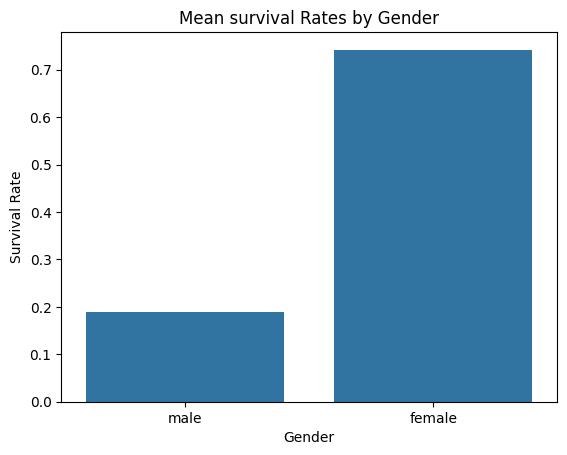

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
mean_servival = titanic.groupby('Sex')['Survived'].mean()
print(mean_servival)
sns.barplot(x = 'Sex',y = 'Survived', data = titanic, ci=None)
plt.title("Mean survival Rates by Gender")
plt.ylabel("Survival Rate")
plt.xlabel("Gender")
plt.show()

Problem - 5:

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

<ipython-input-79-85ca9e4094eb>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x ='Embarked',y = 'Survived', hue = 'Sex',kind = 'bar', data = titanic_reRead,ci=None)


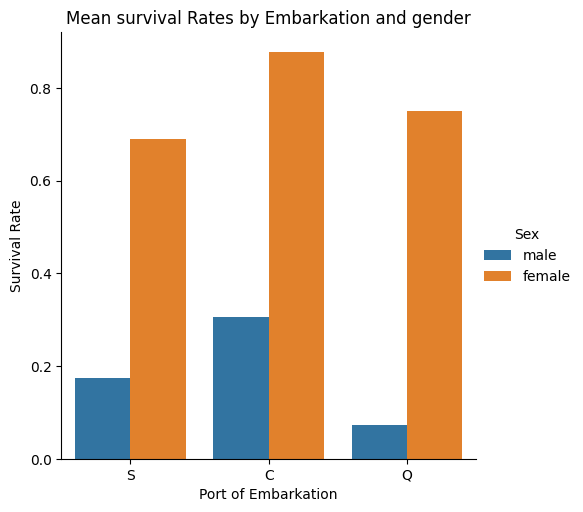

In [79]:
titanic_reRead = pd.read_csv('/content/drive/MyDrive/dataset/Titanic-Dataset.csv')
sns.catplot(x ='Embarked',y = 'Survived', hue = 'Sex',kind = 'bar', data = titanic_reRead,ci=None)
plt.title("Mean survival Rates by Embarkation and gender")
plt.ylabel("Survival Rate")
plt.xlabel("Port of Embarkation")
plt.show( )

Problem - 6{Optional}:

Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the
’Age’ column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class
and age group. Draw a visualization using a any plotting library to represent this graphically.

<ipython-input-80-6b68beeec073>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_survival = titanic.groupby(['Pclass','AgeGroup'])['Survived'].mean().unstack()


AgeGroup  (0.419, 19.0]  (19.0, 25.0]  (25.0, 31.8]  (31.8, 41.0]  \
Pclass                                                              
1              0.809524      0.761905      0.666667      0.777778   
2              0.742857      0.400000      0.416667      0.461538   
3              0.333333      0.197674      0.283582      0.166667   

AgeGroup  (41.0, 80.0]  
Pclass                  
1             0.506667  
2             0.363636  
3             0.088235  


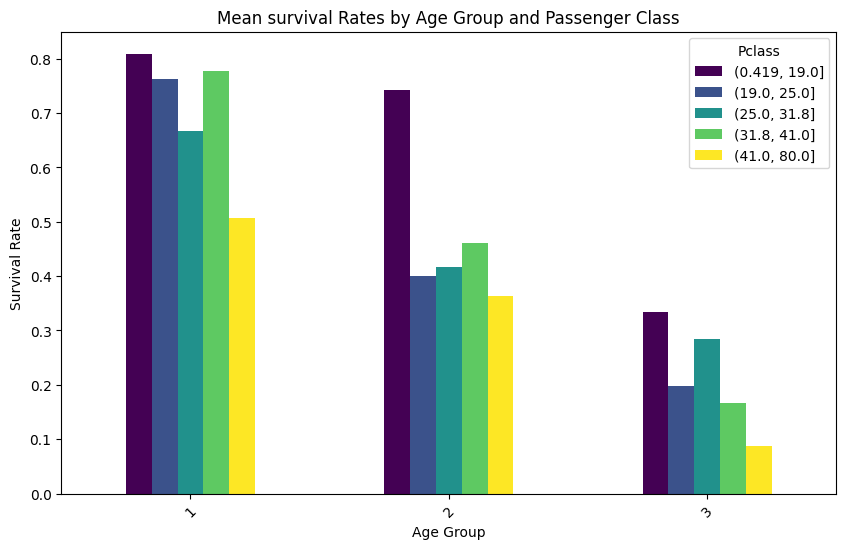

In [80]:
titanic['AgeGroup'] = pd.qcut(titanic['Age'],q=5)
# creating age quantiles
mean_survival = titanic.groupby(['Pclass','AgeGroup'])['Survived'].mean().unstack()
print(mean_survival)#calculating survical rates
mean_survival.plot(kind='bar',figsize=(10,6),colormap ='viridis')
plt.title("Mean survival Rates by Age Group and Passenger Class")
plt.ylabel("Survival Rate")
plt.xlabel("Age Group")
plt.xticks(rotation =45)
plt.legend(title = 'Pclass')
plt.show()